<a href="https://colab.research.google.com/github/noragriffith/WorldBankTest/blob/main/test_code_noragriffith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Getting data

In [2]:
# Read data from Github repository
url = 'https://raw.githubusercontent.com/noragriffith/WorldBankTest/main/Test_Names.csv'
comm_trans_df = pd.read_csv(url)



# Inspecting the dataframe



In [3]:
comm_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106526 entries, 0 to 106525
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   domestic        105890 non-null  object
 1   transaction_id  106526 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [4]:
# Rename 'domestic' column with a more meaningful name 'firm_name'
comm_trans_df.rename(columns={'domestic': 'firm_name'}, inplace=True)

# Analyzing null cases
- **firm_name** is not available for 0.6% of the records. Upon analysis, I decided to remove those records as it did not give any significant insight to the data. A total of 636 records were removed.

In [5]:
# Checking null cases
comm_trans_df.isnull().sum()/len(comm_trans_df)*100

firm_name         0.597037
transaction_id    0.000000
dtype: float64

In [6]:
# Keep records with missing 'firm_name' values
comm_trans_df_null = comm_trans_df[comm_trans_df['firm_name'].isnull()==True]
comm_trans_df_null.head()

,firm_name,transaction_id
294,NaN,295
3217,NaN,3218
8785,NaN,8786
9819,NaN,9820
10036,NaN,10037


# Data cleaning

In [7]:
# Cleaning records with null values
comm_trans_df = comm_trans_df.dropna()
comm_trans_df.isnull().sum()

firm_name         0
transaction_id    0
dtype: int64

# Data normalization
I have normalized **firm_name** entries to have a closer match among companies names. I implemented the normalization through the function **clean_companies(series)** that performs following steps;
- Lower case each entry of the series
- Replace special characters with an empty string
- Replace words that identify the most common types of companies such as *private, limited, pivt, pvt, plc, ltd, lt, co, sa* with an empty string by using a word boundary regular expression to avoid partial replacements
- Remove extra spaces before and after the company name 

Originally the dataset contained 15,453 entries identified as unique at the **firm_name** column, after the data normalization process this number dropped to **14,164** entries, that is, **1,289** entries less.


In [8]:
# Performs data normalization on a series
def clean_companies(series):
  return series.str.lower().str.replace(r"[^a-z0-9\s]", '').str.replace(r"\b(private|limited|pivt|pvt|plc|ltd|lt|co|sa)\b",'').str.strip()


In [9]:
clean_companies(comm_trans_df['firm_name'])

0                   a class trading
1                       a k y lanka
2         a r freight care services
3         ace international express
4                     aero dynamics
                    ...            
106521                   usui lanka
106522                 variosystems
106523         wayamba natural peat
106524             wichy plantation
106525               workwear lanka
Name: firm_name, Length: 105890, dtype: object

In [10]:
# Performs data normalization on 'firm_name' column and add a new column with those clean names
comm_trans_df['firm_name_clean']=clean_companies(comm_trans_df['firm_name'])

In [11]:
comm_trans_df

,firm_name,transaction_id,firm_name_clean
0,"A Class Trading Pvt., Ltd.",1,a class trading
1,"A K Y Lanka Pvt., Ltd.",2,a k y lanka
2,"A R Freight Care Services Pvt., Ltd.",3,a r freight care services
3,"Ace International Express Pvt., Ltd.",4,ace international express
4,Aero Dynamics (Pvt) Ltd.,5,aero dynamics
...,...,...,...
106521,Usui Lanka (Pvt) Ltd.,106522,usui lanka
106522,"Variosystems Pvt., Ltd.",106523,variosystems
106523,Wayamba Natural Peat,106524,wayamba natural peat
106524,Wichy Plantation Co. (Pvt) Ltd.,106525,wichy plantation


# Creating an unique identifier to each firm

In [12]:
# create a list of unique names
names = comm_trans_df['firm_name_clean'].unique().tolist()

In [13]:
# generates firm ids
ids = np.arange(1,len(names)+1,1)

In [14]:
# maps ids to names
maps = {k:v for k,v in zip(names, ids)}

In [15]:
# add new 'firm_id' column to the dataframe
comm_trans_df['firm_id'] = comm_trans_df['firm_name_clean'].map(maps)

In [16]:
comm_trans_df

,firm_name,transaction_id,firm_name_clean,firm_id
0,"A Class Trading Pvt., Ltd.",1,a class trading,1
1,"A K Y Lanka Pvt., Ltd.",2,a k y lanka,2
2,"A R Freight Care Services Pvt., Ltd.",3,a r freight care services,3
3,"Ace International Express Pvt., Ltd.",4,ace international express,4
4,Aero Dynamics (Pvt) Ltd.,5,aero dynamics,5
...,...,...,...,...
106521,Usui Lanka (Pvt) Ltd.,106522,usui lanka,934
106522,"Variosystems Pvt., Ltd.",106523,variosystems,734
106523,Wayamba Natural Peat,106524,wayamba natural peat,2280
106524,Wichy Plantation Co. (Pvt) Ltd.,106525,wichy plantation,939


# Creating a firm dataframe

In [17]:
# Select specific columns from a dataframe and creates a new one
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

In [18]:
# Create a dataframe with firm names and their corresponding Ids
selected_columns = ['firm_name','firm_id']
firms_df = select_columns(comm_trans_df, selected_columns)
firms_df.tail(50)

,firm_name,firm_id
106476,Scanwell Logistics,14094
106477,Screenplay Trading Co.,4400
106478,Sdp Exp. Exp.,6972
106479,"Seybi Trading Pvt., Ltd.",5535
106480,"Shan Teas Pvt., Ltd.",1517
106481,Sheyanro Enterprises,7290
106482,Sky International,13574
106483,Skynet W W E (Pvt) Ltd.,13880
106484,"Spectra Innovations Lanka Pvt., Ltd.",4430
106485,Srilankan Airlines Ltd.,8463


# Plotting 

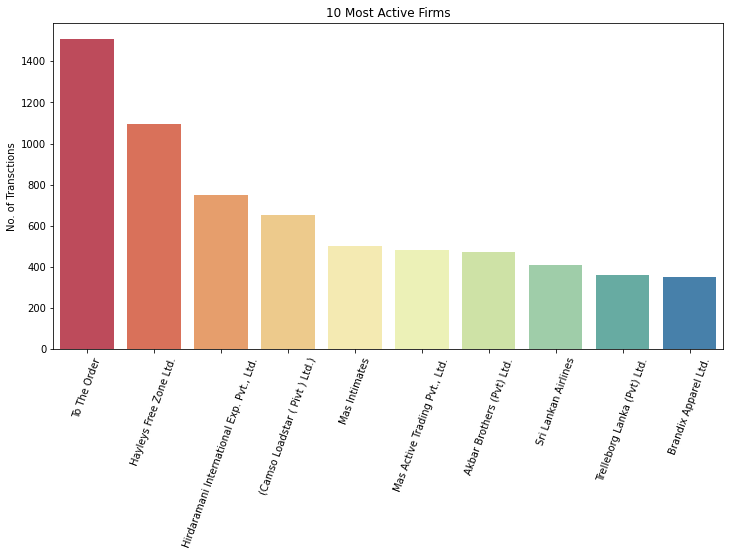

In [19]:
#Top 10 companies by number of transactions
top_10 = comm_trans_df['firm_name'].value_counts()[:10]

#plot for the top 10 countries
plt.figure(figsize=(12,6))
plt.xticks(rotation=70)
sns.barplot(x=top_10.index, y=top_10, palette = 'Spectral')
plt.ylabel("No. of Transctions")
plt.title("10 Most Active Firms")
plt.show()